In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [2]:
#Use BDSX, que é um banco de dados já tratado

x = pd.read_csv(filepath_or_buffer='BDSCLEANED.txt', sep = '\t')
x = x.drop('Unnamed: 0', axis =1 )

x

,Subject,Age,AgeGroup,Gender,Height,Weight,BMI,FootLen,Nationality,SkinColor,...,y_Mean_Resultant_Speed_cop - Closed - Foam,y_fpcntile50_cop - Closed - Foam,y_fpcntile95_cop - Closed - Foam,y_Peaky_Frequency_cop - Closed - Foam,y_Mean_Frequency_cop - Closed - Foam,y_Total_power_cop - Closed - Foam,APA,RPC,SO,DG
0,1,33.000000,Young,0,157.5,54.20,21.849332,21.80,Brazil,Yellow,...,0.026691,0.177778,0.844444,0.033333,0.255995,0.154036,6.0,4.0,6.0,9.0
1,2,27.583333,Young,0,154.0,44.00,18.552876,22.45,Brazil,Pardo/Brown,...,0.037090,0.255556,0.511111,0.266667,0.264554,0.418301,6.0,4.0,6.0,9.0
2,3,36.916667,Young,1,161.7,63.40,24.247626,23.10,Brazil,White,...,0.047679,0.222222,0.766667,0.111111,0.280833,0.512078,6.0,6.0,6.0,9.0
3,4,61.750000,Old,1,164.0,68.35,25.412701,24.70,Brazil,Pardo/Brown,...,0.066223,0.166667,0.577778,0.066667,0.214622,1.880497,6.0,6.0,6.0,8.0
4,5,18.333333,Young,0,162.0,56.45,21.509678,NaN,Brazil,White,...,0.046808,0.233333,0.966667,0.188889,0.318833,0.413409,6.0,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,159,24.750000,Young,0,153.5,62.05,26.334497,21.65,Brazil,White,...,0.038548,0.311111,0.988889,0.222222,0.382401,0.201918,6.0,6.0,6.0,10.0
154,160,23.583333,Young,0,161.5,56.55,21.681412,22.75,Brazil,White,...,0.052360,0.188889,0.688889,0.033333,0.243581,0.834123,5.0,4.0,6.0,9.0
155,161,25.333333,Young,0,167.7,60.55,21.530198,23.75,Brazil,White,...,0.068107,0.377778,1.177778,0.211111,0.421260,0.516105,6.0,4.0,6.0,9.0
156,162,24.083333,Young,1,183.5,63.20,18.769165,25.75,Brazil,White,...,0.055816,0.188889,1.066667,0.066667,0.326689,0.423302,6.0,5.0,6.0,9.0


In [3]:
x.columns

Index(['Subject', 'Age', 'AgeGroup', 'Gender', 'Height', 'Weight', 'BMI',
       'FootLen', 'Nationality', 'SkinColor',
       ...
       'y_Mean_Resultant_Speed_cop - Closed - Foam',
       'y_fpcntile50_cop - Closed - Foam', 'y_fpcntile95_cop - Closed - Foam',
       'y_Peaky_Frequency_cop - Closed - Foam',
       'y_Mean_Frequency_cop - Closed - Foam',
       'y_Total_power_cop - Closed - Foam', 'APA', 'RPC', 'SO', 'DG'],
      dtype='object', length=181)

In [4]:
y = pd.read_csv(filepath_or_buffer='BDSYall.txt', sep = '\t')

y=y.join(x['APA'])
y=y.join(x['RPC'])
y=y.join(x['SO'])
y=y.join(x['DG'])

y = y.drop('Unnamed: 0', axis =1 )

In [5]:
x.columns[:60]

x=x.drop(columns=['Subject','AgeGroup', 'Gender', 'BMI',
       'FootLen', 'Nationality', 'SkinColor', 'Ystudy', 'Footwear', 'Illness',
       'Illness2', 'Nmedication', 'Medication', 'Ortho-Prosthesis',
       'Ortho-Prosthesis2', 'Disability', 'Disability2', 'Falls12m', 'FES_1',
       'FES_2', 'FES_3', 'FES_4', 'FES_5', 'FES_6', 'FES_7', 'FES_T', 'FES_S',
       'IPAQ_1a', 'IPAQ_1b', 'IPAQ_2a', 'IPAQ_2b', 'IPAQ_3a', 'IPAQ_3b',
       'IPAQ_4a', 'IPAQ_4b', 'IPAQ_S', 'TMT_timeA', 'TMT_errorsA', 'TMT_timeB',
       'TMT_errorsB', 'Best_1', 'Best_2', 'Best_3l', 'Best_3r', 'Best_4',
       'Best_5', 'Best_6l', 'Best_6r', 'Best_7', 'Best_8', 'Best_9', 'Best_10',
       'Best_11', 'Best_12', 'Best_13', 'Best_14', 'Best_T', 'APA', 'RPC', 'SO', 'DG'])

In [6]:
x

,Age,Height,Weight,COParea - Open - Firm,COPvelo - Open - Firm,COPmfreq - Open - Firm,x_mean_value_detrended_cop - Open - Firm,x_variance_cop - Open - Firm,x_skewness_cop - Open - Firm,x_rms_cop - Open - Firm,...,y_rms_cop - Closed - Foam,y_peaky_to_peaky_cop - Closed - Foam,y_crest_factor_cop - Closed - Foam,y_mean_speed_cop - Closed - Foam,y_Mean_Resultant_Speed_cop - Closed - Foam,y_fpcntile50_cop - Closed - Foam,y_fpcntile95_cop - Closed - Foam,y_Peaky_Frequency_cop - Closed - Foam,y_Mean_Frequency_cop - Closed - Foam,y_Total_power_cop - Closed - Foam
0,33.000000,157.5,54.20,0.827615,0.656039,0.235659,6.213301e-16,0.090274,-170.443117,0.045137,...,0.132248,2.456452,9.292689,1.548130,0.026691,0.177778,0.844444,0.033333,0.255995,0.154036
1,27.583333,154.0,44.00,0.632228,0.543046,0.224833,4.010619e-16,0.099321,14.842603,0.049660,...,0.219629,3.987512,8.877274,2.152440,0.037090,0.255556,0.511111,0.266667,0.264554,0.418301
2,36.916667,161.7,63.40,3.224678,1.062107,0.238608,-4.484314e-16,0.257063,26.931309,0.128532,...,0.313345,4.798872,7.119130,2.815193,0.047679,0.222222,0.766667,0.111111,0.280833,0.512078
3,61.750000,164.0,68.35,3.815930,1.178721,0.264565,1.705303e-16,0.471469,-0.886718,0.235734,...,1.169748,7.915010,3.371220,3.885551,0.066223,0.166667,0.577778,0.066667,0.214622,1.880497
4,18.333333,162.0,56.45,3.129373,0.828193,0.120730,-2.305316e-16,0.473426,-4.029848,0.236713,...,0.242126,3.536557,7.324999,2.682804,0.046808,0.233333,0.966667,0.188889,0.318833,0.413409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,24.750000,153.5,62.05,0.912748,0.584808,0.205786,1.405296e-16,0.093909,-74.424912,0.046954,...,0.109990,2.716360,13.171693,2.250038,0.038548,0.311111,0.988889,0.222222,0.382401,0.201918
154,23.583333,161.5,56.55,1.531402,0.763516,0.314124,4.421155e-17,0.189740,-46.839857,0.094870,...,0.597571,5.436852,4.307466,3.035766,0.052360,0.188889,0.688889,0.033333,0.243581,0.834123
155,25.333333,167.7,60.55,3.281855,0.813245,0.163213,-6.315935e-17,0.188630,-2.731484,0.094315,...,0.260107,4.468592,9.183936,3.749442,0.068107,0.377778,1.177778,0.211111,0.421260,0.516105
156,24.083333,183.5,63.20,1.677234,0.680564,0.168897,-8.684411e-17,0.183400,15.698552,0.091700,...,0.226232,3.788552,7.931388,3.226258,0.055816,0.188889,1.066667,0.066667,0.326689,0.423302


In [7]:
def agrupamento(x, y = None, exc = None, centers = None):
    base = pd.read_csv(filepath_or_buffer='C:/Users/natha/Projeto de Extensão/2020/FiltredBDS.txt', sep = '\t')
    #base = pd.read_csv(filepath_or_buffer='wave.txt',sep='\t')
    
    if exc:
        exc=[]
        for n in range(len(y)):
            if y.iloc[n,:]['Best_T'] in [8,9,10,11,12,13]:
                exc.append(n)
        x = x.drop(exc)
        x = x.reset_index()
        x = x.drop("index",axis = 1)
        y = y.drop(exc)
        y = y.reset_index()
        y = y.drop("index",axis = 1)
        base = base.drop(exc)
        base = base.reindex()         

    # separando os clusters    
    xin = base[['Age','Height','Weight']]

    entradas = 'clusterant'
    kmeans = KMeans(n_clusters=2,n_init = 15, random_state=None, max_iter = 5000).fit(xin)
    labels = kmeans.labels_
    x[entradas] = np.array(labels)
    
    entradas = "cluster"
    
    xin = base[['Age','Height','Weight',
        'COParea - Open - Firm','COPvelo - Open - Firm','COPmfreq - Open - Firm',
        'COParea - Closed - Firm', 'COPvelo - Closed - Firm', 'COPmfreq - Closed - Firm',
        'COParea - Open - Foam', 'COPvelo - Open - Foam', 'COPmfreq - Open - Foam',
        'COParea - Closed - Foam', 'COPvelo - Closed - Foam', 'COPmfreq - Closed - Foam']]

    kmeans = KMeans(n_clusters=2,n_init = 15, random_state=None, max_iter = 5000).fit(xin)
    labels = kmeans.labels_
    x[entradas] = np.array(labels)
    
    
    entradas = "all"
    xin = x.iloc[:,:127]
    kmeans = KMeans(n_clusters=2,n_init = 15, random_state=None, max_iter = 5000).fit(xin)
    labels = kmeans.labels_
    x[entradas] = np.array(labels)
    
    if centers != None:
        return kmeans.cluster_centers_
    
    return x,y
    #accuracy_score(labels,YB.values.ravel() )
    

In [8]:
# Exclui os outliars e faz o kmeans
x_, y_ = agrupamento(x, y, exc = None, centers = None)

C:\Users\natha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
# função que retorna o modelo de entrada a ser usada
def preset(x,y, median = None, cluster= None):
    Y = y.copy()
    X = x.copy()
    
    if median == 'above':
        below=[]
        for n in range(len(y)):
            if y.iloc[n,:]['Best_A'] != 1:
                below.append(n)
        X = X.drop(below)
        X = X.reindex()
        Y = Y.drop(below)
        Y = Y.reindex()
        
        return X,Y
    
    elif median == 'below':
        above = []
        for n in range(len(y)):
            if y.iloc[n,:]['Best_B'] != 1:
                above.append(n)
        X = X.drop(above)
        X = X.reindex()
        Y = Y.drop(above)
        Y = Y.reindex()
        
        return X,Y
    
    if cluster == 'a':
        b=[]
        for n in range(len(y)):
            if x.iloc[n,:]['cluster'] != 1:
                b.append(n)

        X = X.drop(b)
        X = X.reindex()
        Y = Y.drop(b)
        Y = Y.reindex()
        
        print(len(b))
        
        return X,Y
        
    elif cluster == 'b':
        a=[]
        for n in range(len(y)):
            if x.iloc[n,:]['cluster'] != 0:
                a.append(n)
        
        X = X.drop(a)
        X = X.reindex()
        Y = Y.drop(a)
        Y = Y.reindex()
        
        print(len(a))
        
        return X,Y
    
    
    if cluster == 'aa':
        
        b=[]
        for n in range(len(y)):
            if x.iloc[n,:]['clusterant'] != 1:
                b.append(n)
        
        X = X.drop(b)
        X = X.reindex()
        Y = Y.drop(b)
        Y = Y.reindex()
        print(len(b))
        return X,Y
        
    elif cluster== 'ab':
        a=[]
        for n in range(len(y)):
            if x.iloc[n,:]['clusterant'] != 0:
                a.append(n)
        
        X = X.drop(a)
        X = X.reindex()
        Y = Y.drop(a)
        Y = Y.reindex()
        print(len(a))
        return X,Y
    
    if cluster== 'alla':
        b=[]
        for n in range(len(y)):
            if x.iloc[n,:]['all'] != 1:
                b.append(n)
        
        X = X.drop(b)
        X = X.reindex()
        Y = Y.drop(b)
        Y = Y.reindex()
        print(len(b))
        return X,Y
        
    elif cluster== 'allb':
        a=[]
        for n in range(len(y)):
            if x.iloc[n,:]['all'] != 0:
                a.append(n)
        
        X = X.drop(a)
        X = X.reindex()
        Y = Y.drop(a)
        Y = Y.reindex()
        print(len(a))
        return X,Y
    
    return X,Y
        

In [10]:
X, Y = preset(x_,y_, cluster =  'b')

83


In [11]:
def svrf(x,y,x_1 = None, y_1=None, x_2 = None, y_2 = None,cruz = None):
    
    x1 = x.values
    y1 = y.values
    
    
    parametros = {'kernel':('poly', 'rbf', 'sigmoid'), 'epsilon':[(x/10) for x in range(1,10,1)]}
    
    svrq = SVR()
    clf = GridSearchCV(svrq, parametros, scoring='neg_mean_absolute_error', cv= 10)
    
    clf.fit(x1,y1)
    
    if cruz != None:
        x_1 = x_1.values
        y_1 = y_1.values
        
        x_2 = x_2.values
        y_2 = y_2.values
        
        predict1 = clf.predict(x_1)
        score1 = mean_absolute_error(predict1, y_1)
        
        predict2 = clf.predict(x_2)
        score2 = mean_absolute_error(predict2, y_2)
        
        return (-clf.best_score_, clf.best_params_, score1, score2)
    
    return (-clf.best_score_, clf.best_params_)

In [12]:
def rff(x,y,x_1 = None, y_1=None, x_2 = None, y_2 = None,cruz = None):
    x1 = x.values
    y1 = y.values
    
    
    regr=RandomForestRegressor()
    
    parametros = {'criterion':('squared_error', 'poisson', 'absolute_error', 'friedman_mse')}
    
    clf = GridSearchCV(regr, parametros, scoring='neg_mean_absolute_error', cv= 10)
    clf.fit(x1,y1)
    
    if cruz != None:
        x_1 = x_1.values
        y_1 = y_1.values
        
        x_2 = x_2.values
        y_2 = y_2.values
        
        predict1 = clf.predict(x_1)
        score1 = mean_absolute_error(predict1, y_1)
        
        predict2 = clf.predict(x_2)
        score2 = mean_absolute_error(predict2, y_2)
        
        return (-clf.best_score_, clf.best_params_, score1, score2)
    
    return (-clf.best_score_, clf.best_params_)

In [13]:
def knnf(x,y,x_1 = None, y_1=None, x_2 = None, y_2 = None,cruz = None):
    
    x1 = x.values
    y1 = y.values
    
    
    parametros = {'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'), 'n_neighbors':(2,3,5)}
    
    knn = KNNR()
    clf = GridSearchCV(knn, parametros, scoring='neg_mean_absolute_error', cv= 10)
    
    clf.fit(x1,y1)
    
    if cruz != None:
        x_1 = x_1.values
        y_1 = y_1.values
        
        x_2 = x_2.values
        y_2 = y_2.values
        
        predict1 = clf.predict(x_1)
        score1 = mean_absolute_error(predict1, y_1)
        
        predict2 = clf.predict(x_2)
        score2 = mean_absolute_error(predict2, y_2)
        
        return (-clf.best_score_, clf.best_params_, score1, score2)
    
    return (-clf.best_score_,clf.best_params_)

In [14]:
z = np.zeros(7)


In [15]:
z = np.zeros(7)
dataresults = pd.DataFrame({'cluster':('M-none', 'M-above', 'M-below', 'RA-To-B', 'RB-To-A','C-A', 'C-B'),'rf':(z),'svm':(z),'knn':(z)})
dataresultsAPA = dataresults.copy()
dataresultsRPC = dataresults.copy()
dataresultsSO  = dataresults.copy()
dataresultsDG  = dataresults.copy()
dataparams  = pd.DataFrame({'cluster':('M-none', 'M-above', 'M-below', 'C-A-To-B', 'C-B-To-A','C-A', 'C-B'),'rf':(z),'svm':(z),'knn':(z)})


In [16]:
dataresults

,cluster,rf,svm,knn
0,M-none,0.0,0.0,0.0
1,M-above,0.0,0.0,0.0
2,M-below,0.0,0.0,0.0
3,RA-To-B,0.0,0.0,0.0
4,RB-To-A,0.0,0.0,0.0
5,C-A,0.0,0.0,0.0
6,C-B,0.0,0.0,0.0


for cluster in [None,'a','b']:
    
    if cluster == None:
        print("Mediana")
        
        for n ,median in enumerate([None, 'above','below']):
            print(median)
            
            X, Y = preset(x,y, median = median )
            Y = Y['Best_T']
            
            
            rf, prf = rff(X,Y)
            print(rf)
            svm, psvm = svrf(X,Y)
            print(svm)
            knn, pknn = knnf(X,Y)
            print(knn)
            
            resultados = [rf,svm,knn]
            
            parametros=[str(prf),str(psvm),str(pknn)]
            
            dataresults.iloc[n,1:] = resultados
            dataparams.iloc[n,1:] = parametros
    
    else:
        print(cluster)
        n+=1
        X, Y = preset(x,y, cluster = cluster)
        Y = Y['Best_T']

        rf, prf = rff(X,Y)
        svm, psvm = svrf(X,Y)
        knn, pknn = knnf(X,Y)

        resultados = [rf,svm,knn]
        parametros=[str(prf),str(psvm),str(pknn)]

        dataresults.iloc[n,1:] = resultados
        dataparams.iloc[n,1:] = parametros
        
    
            
            

In [17]:
for n ,median in enumerate([None, 'above','below']):
    
    
    if median == None:
        X, Y = preset(x_,y_, median = median )
        Y = Y['Best_T']


        rf, prf = rff(X,Y)
        print(rf)
        svm, psvm = svrf(X,Y)
        print(svm)
        knn, pknn = knnf(X,Y)
        print(knn)

        resultados = [rf,svm,knn]

        #parametros=[str(prf),str(psvm),str(pknn)]

        dataresults.iloc[n,1:] = resultados
        #dataparams.iloc[n,1:] = parametros 
        
    else:
    
        X, Y = preset(x,y, median = median )
        Y = Y['Best_T']
        
        # pegando os dados para cruzamento
        if median == 'above':
            x1,y1 = preset(x,y, median = 'below' )
            y1 = y1['Best_T']
            
            x2,y2 = preset(x,y, cluster = 'a')
            y2 = y2['Best_T']
        
        else: 
            x1,y1 = preset(x,y, median = 'above' )
            y1 = y1['Best_T']
            
            x2,y2 = preset(x,y, cluster = 'b')
            y2 = y2['Best_T']
        


        rf, prf,score1rf,score2rf = rff(X,Y, x_1=x1, y_1=y1, cruz = 1, x_2 = x2, y_2 =y2)
        print(rf)
        
        svm, psvm,score1svm,score2svm = svrf(X,Y, x_1=x1, y_1=y1, cruz = 1, x_2 = x2, y_2 =y2)
        print(svm)
        
        knn, pknn,score1knn,score2knn = knnf(X,Y, x_1=x1, y_1=y1, cruz = 1, x_2 = x2, y_2 =y2)
        print(knn)

        resultados = [rf,svm,knn]
        cruzamento1 = [score1rf,score1svm,score1knn]
        cruzamento2 = [score2rf,score2svm,score2knn]

        #parametros=[str(prf),str(psvm),str(pknn)]

        dataresults.iloc[n,1:] = resultados
        dataresults.iloc[n+2,1:] = cruzamento1
        dataresults.iloc[n+4,1:] = cruzamento2
        #dataparams.iloc[n,1:] = parametros

2.3973875
3.552335334693251
3.81375
75
1.359472222222222
1.380735150517494
1.6008333333333333
83
2.0541785714285714
2.0487295905743306
2.2921428571428573


In [18]:
dataresults

,cluster,rf,svm,knn
0,M-none,2.397387,3.552335,3.813750
1,M-above,1.359472,1.380735,1.600833
2,M-below,2.054179,2.048730,2.292143
3,RA-To-B,6.042933,6.635485,6.720000
4,RB-To-A,5.859277,6.493472,6.898795
5,C-A,1.190602,1.935331,1.843373
6,C-B,1.507467,2.538842,2.586667


In [19]:
for n ,median in enumerate([None, 'above','below']):
    
    
    if median == None:
        X, Y = preset(x_,y_, median = median )
        Y = Y['APA']


        rf, prf = rff(X,Y)
        print(rf)
        svm, psvm = svrf(X,Y)
        print(svm)
        knn, pknn = knnf(X,Y)
        print(knn)

        resultados = [rf,svm,knn]

        #parametros=[str(prf),str(psvm),str(pknn)]

        dataresults.iloc[n,1:] = resultados
        #dataparams.iloc[n,1:] = parametros 
        
    else:
    
        X, Y = preset(x,y, median = median )
        Y = Y['APA']
        
        # pegando os dados para cruzamento
        if median == 'above':
            x1,y1 = preset(x,y, median = 'below' )
            y1 = y1['APA']
            
            x2,y2 = preset(x,y, cluster = 'a')
            y2 = y2['APA']
        
        else: 
            x1,y1 = preset(x,y, median = 'above' )
            y1 = y1['APA']
            
            x2,y2 = preset(x,y, cluster = 'b')
            y2 = y2['APA']
        


        rf, prf,score1rf,score2rf = rff(X,Y, x_1=x1, y_1=y1, cruz = 1, x_2 = x2, y_2 =y2)
        print(rf)
        
        svm, psvm,score1svm,score2svm = svrf(X,Y, x_1=x1, y_1=y1, cruz = 1, x_2 = x2, y_2 =y2)
        print(svm)
        
        knn, pknn,score1knn,score2knn = knnf(X,Y, x_1=x1, y_1=y1, cruz = 1, x_2 = x2, y_2 =y2)
        print(knn)

        resultados = [rf,svm,knn]
        cruzamento1 = [score1rf,score1svm,score1knn]
        cruzamento2 = [score2rf,score2svm,score2knn]

        #parametros=[str(prf),str(psvm),str(pknn)]

        dataresults.iloc[n,1:] = resultados
        dataresults.iloc[n+2,1:] = cruzamento1
        dataresults.iloc[n+4,1:] = cruzamento2
        #dataparams.iloc[n,1:] = parametros

0.7254375000000001
1.1637725056681412
1.2995833333333333
75
0.5445277777777777
0.5887748845225215
0.6986111111111111
83
0.6975
0.8015108232269004
0.8275


In [20]:
dataresults

,cluster,rf,svm,knn
0,M-none,0.725438,1.163773,1.299583
1,M-above,0.544528,0.588775,0.698611
2,M-below,0.697500,0.801511,0.827500
3,RA-To-B,1.464533,2.500220,2.006667
4,RB-To-A,1.416988,2.140776,2.086747
5,C-A,0.318072,0.603524,0.403614
6,C-B,0.372933,0.795974,0.744000


In [21]:
dataresults.to_csv('Cruzamentomenos4.txt',sep = '\t')

In [22]:
dataparams.to_csv('Resultswmenos4.txt',sep = '\t')

# Regressores com a clusterização do Kmeans

In [23]:
z = np.zeros(6)
dataresults  = pd.DataFrame({'cluster':('Ant + Feat A', 'Ant + Feat B', 'Ant A', 'Ant B', 'All A', 'All B'),'rf':(z),'svm':(z),'knn':(z)})
dataresultsapa = dataresults.copy().add_suffix('_apa')
dataresultsrpc = dataresults.copy().add_suffix('_rpc')
dataresultsso = dataresults.copy().add_suffix('_so')
dataresultsdg = dataresults.copy().add_suffix('_dg')



dataparams  = pd.DataFrame({'cluster':('Ant + Feat A', 'Ant + Feat B', 'Ant A', 'Ant B','All A', 'All B'),'rf':(z),'svm':(z),'knn':(z)})

In [24]:
# os termos que tem prefixo de a, são grupos feitos com os dados puramente antropométricos, sem nenhuma feature
#for n, cluster in enumerate(['a','b','aa','ab','alla',"allb"]):
for n, cluster in enumerate(['a','b','aa','ab']):
    X, Y = preset(x_,y_, cluster =  cluster)
    Y = Y['Best_T']
        
    rf, prf = rff(X,Y)
    #print(rf)
    svm, psvm = svrf(X,Y)
    #print(svm)
    knn, pknn = knnf(X,Y)
    #print(knn)

    resultados = [rf,svm,knn]

    parametros=[str(prf),str(psvm),str(pknn)]

    dataresults.iloc[n,1:] = resultados
    dataparams.iloc[n,1:] = parametros 
dataresults

75
83
75
83


,cluster,rf,svm,knn
0,Ant + Feat A,2.125986,1.976964,2.227500
1,Ant + Feat B,2.492875,2.543603,2.969286
2,Ant A,2.192972,2.104779,2.437500
3,Ant B,2.475286,2.572882,2.911071
4,All A,0.000000,0.000000,0.000000
5,All B,0.000000,0.000000,0.000000


In [25]:
dataresults

,cluster,rf,svm,knn
0,Ant + Feat A,2.125986,1.976964,2.227500
1,Ant + Feat B,2.492875,2.543603,2.969286
2,Ant A,2.192972,2.104779,2.437500
3,Ant B,2.475286,2.572882,2.911071
4,All A,0.000000,0.000000,0.000000
5,All B,0.000000,0.000000,0.000000


In [26]:
# os termos que tem prefixo de a, são grupos feitos com os dados puramente antropométricos, sem nenhuma feature
#for n, cluster in enumerate(['a','b','aa','ab','alla',"allb"]):
for n, cluster in enumerate(['a','b','aa','ab']):
    X, Y = preset(x_,y_, cluster =  cluster)
    Y = Y['APA']
        
    rf, prf = rff(X,Y)
    #print(rf)
    svm, psvm = svrf(X,Y)
    #print(svm)
    knn, pknn = knnf(X,Y)
    #print(knn)

    resultados = [rf,svm,knn]

    parametros=[str(prf),str(psvm),str(pknn)]

    dataresultsapa.iloc[n,1:] = resultados
    dataparams.iloc[n,1:] = parametros 
dataresultsapa

75
83
75
83


,cluster_apa,rf_apa,svm_apa,knn_apa
0,Ant + Feat A,0.624278,0.611594,0.642361
1,Ant + Feat B,0.756446,0.785592,0.811429
2,Ant A,0.634153,0.659094,0.655556
3,Ant B,0.776375,0.794819,0.822143
4,All A,0.000000,0.000000,0.000000
5,All B,0.000000,0.000000,0.000000


In [27]:
# os termos que tem prefixo de a, são grupos feitos com os dados puramente antropométricos, sem nenhuma feature
#for n, cluster in enumerate(['a','b','aa','ab','alla',"allb"]):
for n, cluster in enumerate(['a','b','aa','ab']):
    X, Y = preset(x_,y_, cluster =  cluster)
    Y = Y['RPC']
        
    rf, prf = rff(X,Y)
    #print(rf)
    svm, psvm = svrf(X,Y)
    #print(svm)
    knn, pknn = knnf(X,Y)
    #print(knn)

    resultados = [rf,svm,knn]

    parametros=[str(prf),str(psvm),str(pknn)]

    dataresultsrpc.iloc[n,1:] = resultados
    dataparams.iloc[n,1:] = parametros 
dataresultsrpc

75
83
75
83


,cluster_rpc,rf_rpc,svm_rpc,knn_rpc
0,Ant + Feat A,0.896250,0.937511,0.955000
1,Ant + Feat B,1.034661,0.963383,1.076190
2,Ant A,0.913347,0.937578,0.964722
3,Ant B,1.007232,0.967716,1.080952
4,All A,0.000000,0.000000,0.000000
5,All B,0.000000,0.000000,0.000000


In [28]:
# os termos que tem prefixo de a, são grupos feitos com os dados puramente antropométricos, sem nenhuma feature
#for n, cluster in enumerate(['a','b','aa','ab','alla',"allb"]):
for n, cluster in enumerate(['a','b','aa','ab']):
    X, Y = preset(x_,y_, cluster =  cluster)
    Y = Y['SO']
        
    rf, prf = rff(X,Y)
    #print(rf)
    svm, psvm = svrf(X,Y)
    #print(svm)
    knn, pknn = knnf(X,Y)
    #print(knn)

    resultados = [rf,svm,knn]

    parametros=[str(prf),str(psvm),str(pknn)]

    dataresultsso.iloc[n,1:] = resultados
    dataparams.iloc[n,1:] = parametros 
dataresultsso

75
83
75
83


,cluster_so,rf_so,svm_so,knn_so
0,Ant + Feat A,0.572194,0.495538,0.578472
1,Ant + Feat B,0.742821,0.682873,0.797024
2,Ant A,0.590028,0.530533,0.590972
3,Ant B,0.689304,0.665625,0.762500
4,All A,0.000000,0.000000,0.000000
5,All B,0.000000,0.000000,0.000000


In [29]:
# os termos que tem prefixo de a, são grupos feitos com os dados puramente antropométricos, sem nenhuma feature
#for n, cluster in enumerate(['a','b','aa','ab','alla',"allb"]):
for n, cluster in enumerate(['a','b','aa','ab']):
    X, Y = preset(x_,y_, cluster =  cluster)
    Y = Y['DG']
        
    rf, prf = rff(X,Y)
    #print(rf)
    svm, psvm = svrf(X,Y)
    #print(svm)
    knn, pknn = knnf(X,Y)
    #print(knn)

    resultados = [rf,svm,knn]

    parametros=[str(prf),str(psvm),str(pknn)]

    dataresultsdg.iloc[n,1:] = resultados
    dataparams.iloc[n,1:] = parametros 
dataresultsdg

75
83
75
83


,cluster_dg,rf_dg,svm_dg,knn_dg
0,Ant + Feat A,1.066667,0.919554,1.095370
1,Ant + Feat B,1.107089,1.181427,1.297024
2,Ant A,1.126014,0.968606,1.148611
3,Ant B,1.069000,1.183943,1.298929
4,All A,0.000000,0.000000,0.000000
5,All B,0.000000,0.000000,0.000000


In [30]:
dataparams.to_csv('RegreKmeansParams.txt',sep = '\t')
dataresults.to_csv('RegreKmeans.txt',sep = '\t')

# Comparativos dos Testes alternativos

In [37]:
tamanho = len(y)
tamanho


158

In [38]:
y.columns

Index(['Unnamed: 0', 'Falls12m', 'FES_1', 'FES_2', 'FES_3', 'FES_4', 'FES_5',
       'FES_6', 'FES_7', 'FES_T', 'FES_S', 'IPAQ_1a', 'IPAQ_1b', 'IPAQ_2a',
       'IPAQ_2b', 'IPAQ_3a', 'IPAQ_3b', 'IPAQ_4a', 'IPAQ_4b', 'IPAQ_S',
       'TMT_timeA', 'TMT_errorsA', 'TMT_timeB', 'TMT_errorsB', 'Best_1',
       'Best_2', 'Best_3l', 'Best_3r', 'Best_4', 'Best_5', 'Best_6l',
       'Best_6r', 'Best_7', 'Best_8', 'Best_9', 'Best_10', 'Best_11',
       'Best_12', 'Best_13', 'Best_14', 'Best_T', 'FES_S_Low Concern',
       'FES_S_Moderate Concern', 'FES_S_High Concern', 'IPAQ_S_High',
       'IPAQ_S_Moderate', 'IPAQ_S_Low', 'Best_A', 'Best_B'],
      dtype='object')

In [39]:
ipaqH = np.sum(y['IPAQ_S_High'])
ipaqM = np.sum(y['IPAQ_S_Moderate'])
ipaqL = np.sum(y['IPAQ_S_Low'])

relatIH = 'IpaqH:'+'{:0.3f}'.format(ipaqH/158)
relatIM = 'IpaqM:'+'{:0.3f}'.format(ipaqM/158)
relatIL = 'IpaqL:'+'{:0.3f}'.format(ipaqL/158)

In [40]:
fesH = np.sum(y['FES_S_High Concern'])
fesM = np.sum(y['FES_S_Moderate Concern'])
fesL = np.sum(y['FES_S_Low Concern'])

relatFH = 'IpaqH:'+'{:0.3f}'.format(fesH/158)
relatFM = 'IpaqM:'+'{:0.3f}'.format(fesM/158)
relatFL = 'IpaqL:'+'{:0.3f}'.format(fesL/158)

In [41]:
import numpy as np
import matplotlib.pyplot as plt

* Configurando para salvar a imagem empgf

In [42]:
import matplotlib

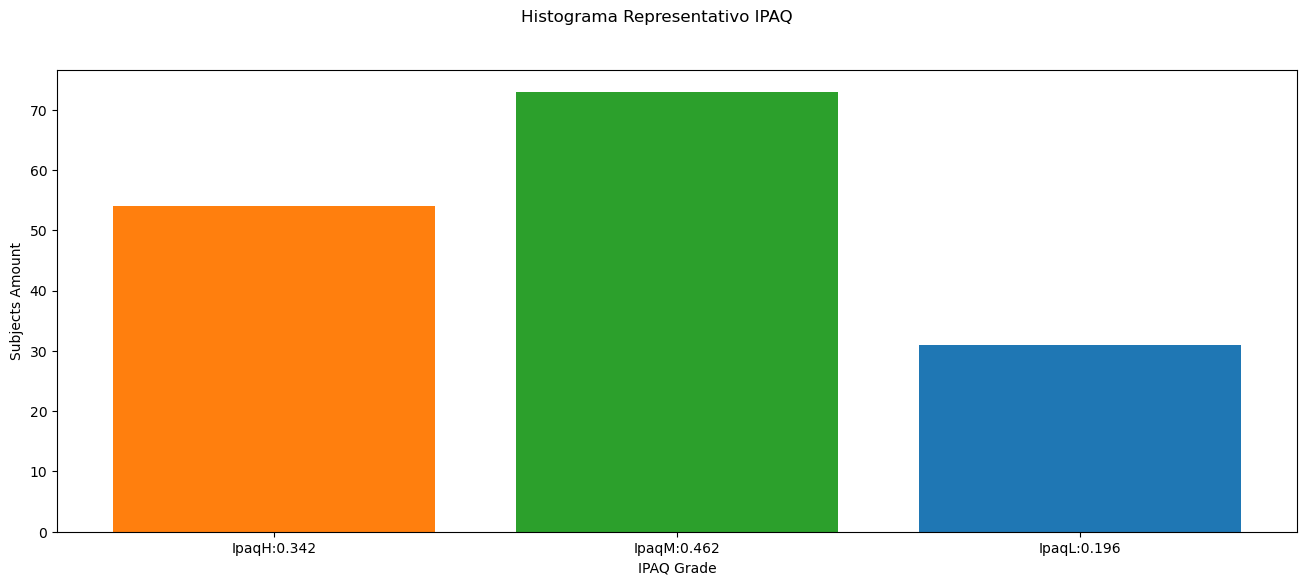

In [43]:
fig, axs = plt.subplots(figsize=(16, 6))
axs.bar([relatIH,relatIM,relatIL], [ipaqH,ipaqM,ipaqL], color =['tab:orange','tab:green','tab:blue'])
fig.suptitle('Histograma Representativo IPAQ')
axs.set_ylabel("Subjects Amount")
axs.set_xlabel("IPAQ Grade")
fig.savefig("histo ipaq.PDF")

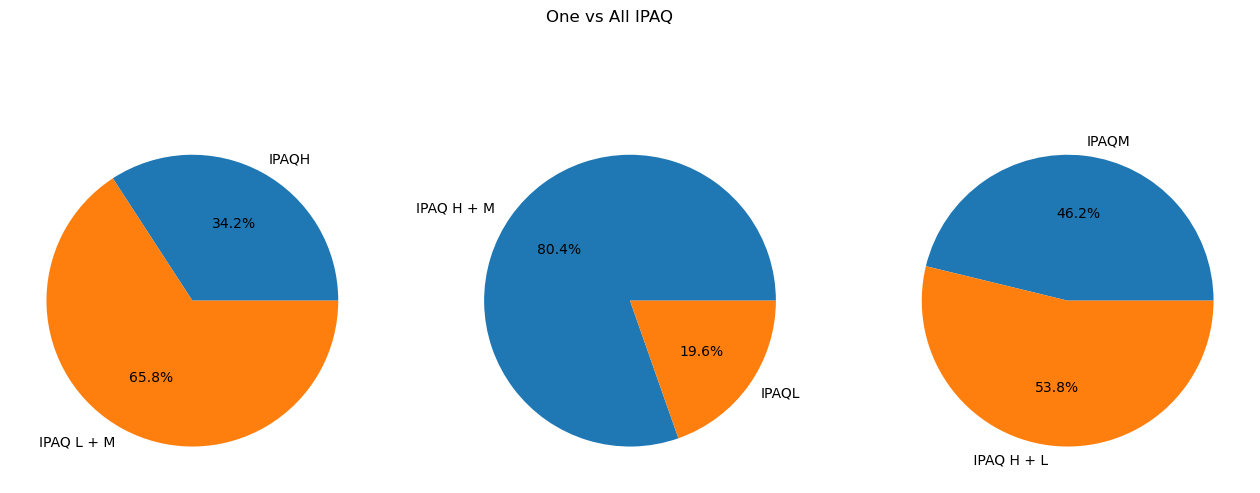

In [44]:
fig1, axs1 = plt.subplots(1,3,figsize=(16, 6))
axs1[0].pie([ipaqH,ipaqM+ipaqL], labels=['IPAQH','IPAQ L + M'],autopct='%1.1f%%')
axs1[1].pie([ipaqH+ipaqM,ipaqL], labels=['IPAQ H + M ', 'IPAQL'],autopct='%1.1f%%')
axs1[2].pie([ipaqM,ipaqL + ipaqH], labels=['IPAQM',' IPAQ H + L'],autopct='%1.1f%%')
fig1.suptitle('One vs All IPAQ')
fig.savefig("ipaq one vs all.PDF")

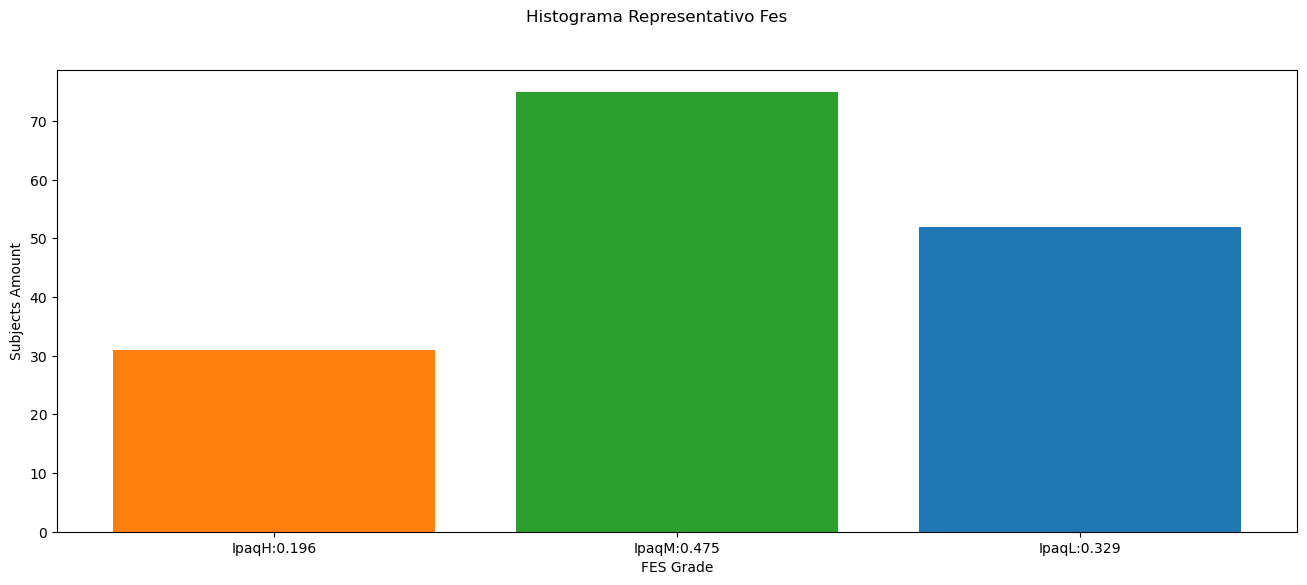

In [45]:
fig, axs = plt.subplots(figsize=(16, 6))
axs.bar([relatFH,relatFM,relatFL], [fesH,fesM,fesL], color =['tab:orange','tab:green','tab:blue'])
fig.suptitle('Histograma Representativo Fes')
axs.set_ylabel("Subjects Amount")
axs.set_xlabel("FES Grade")
fig.savefig("histo fes.PDF")

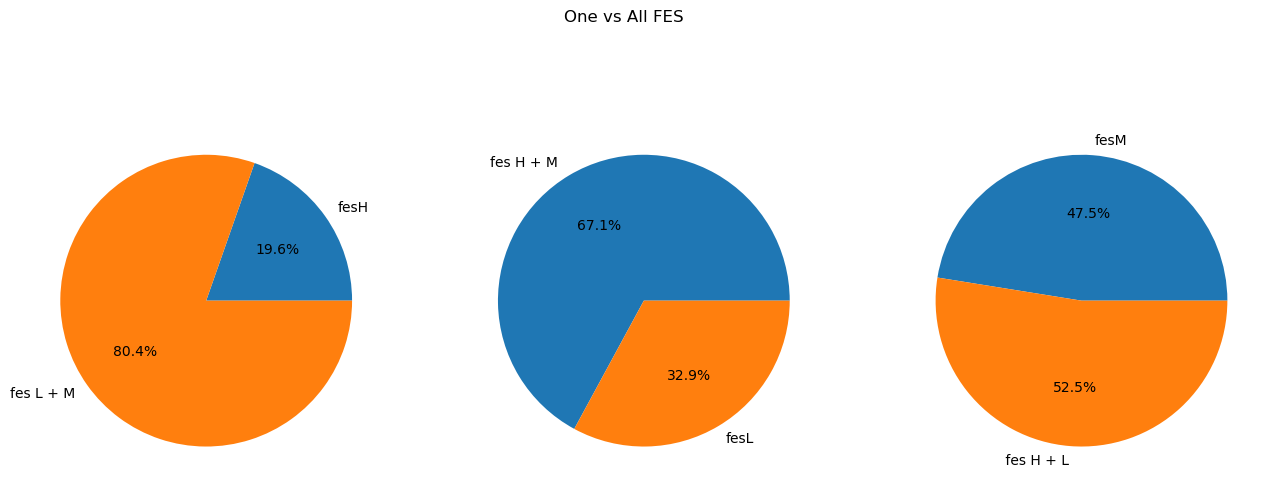

In [46]:
fig1, axs1 = plt.subplots(1,3,figsize=(16, 6))
axs1[0].pie([fesH,fesM+fesL], labels=['fesH','fes L + M'],autopct='%1.1f%%')
axs1[1].pie([fesH+fesM,fesL], labels=['fes H + M ', 'fesL'],autopct='%1.1f%%')
axs1[2].pie([fesM,fesL + fesH], labels=['fesM',' fes H + L'],autopct='%1.1f%%')
fig1.suptitle('One vs All FES')
fig.savefig("fes one vs all.pdf")

In [47]:
correlation = y[['Falls12m', 'FES_1', 'FES_2', 'FES_3', 'FES_4', 'FES_5', 'FES_6','FES_7','IPAQ_1a', 'IPAQ_1b', 'IPAQ_2a', 'IPAQ_2b','IPAQ_3a', 'IPAQ_3b','Best_T', 'FES_S_Low Concern',
       'FES_S_Moderate Concern', 'FES_S_High Concern', 'IPAQ_S_High',
       'IPAQ_S_Moderate', 'IPAQ_S_Low']]

In [48]:
corr = correlation.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

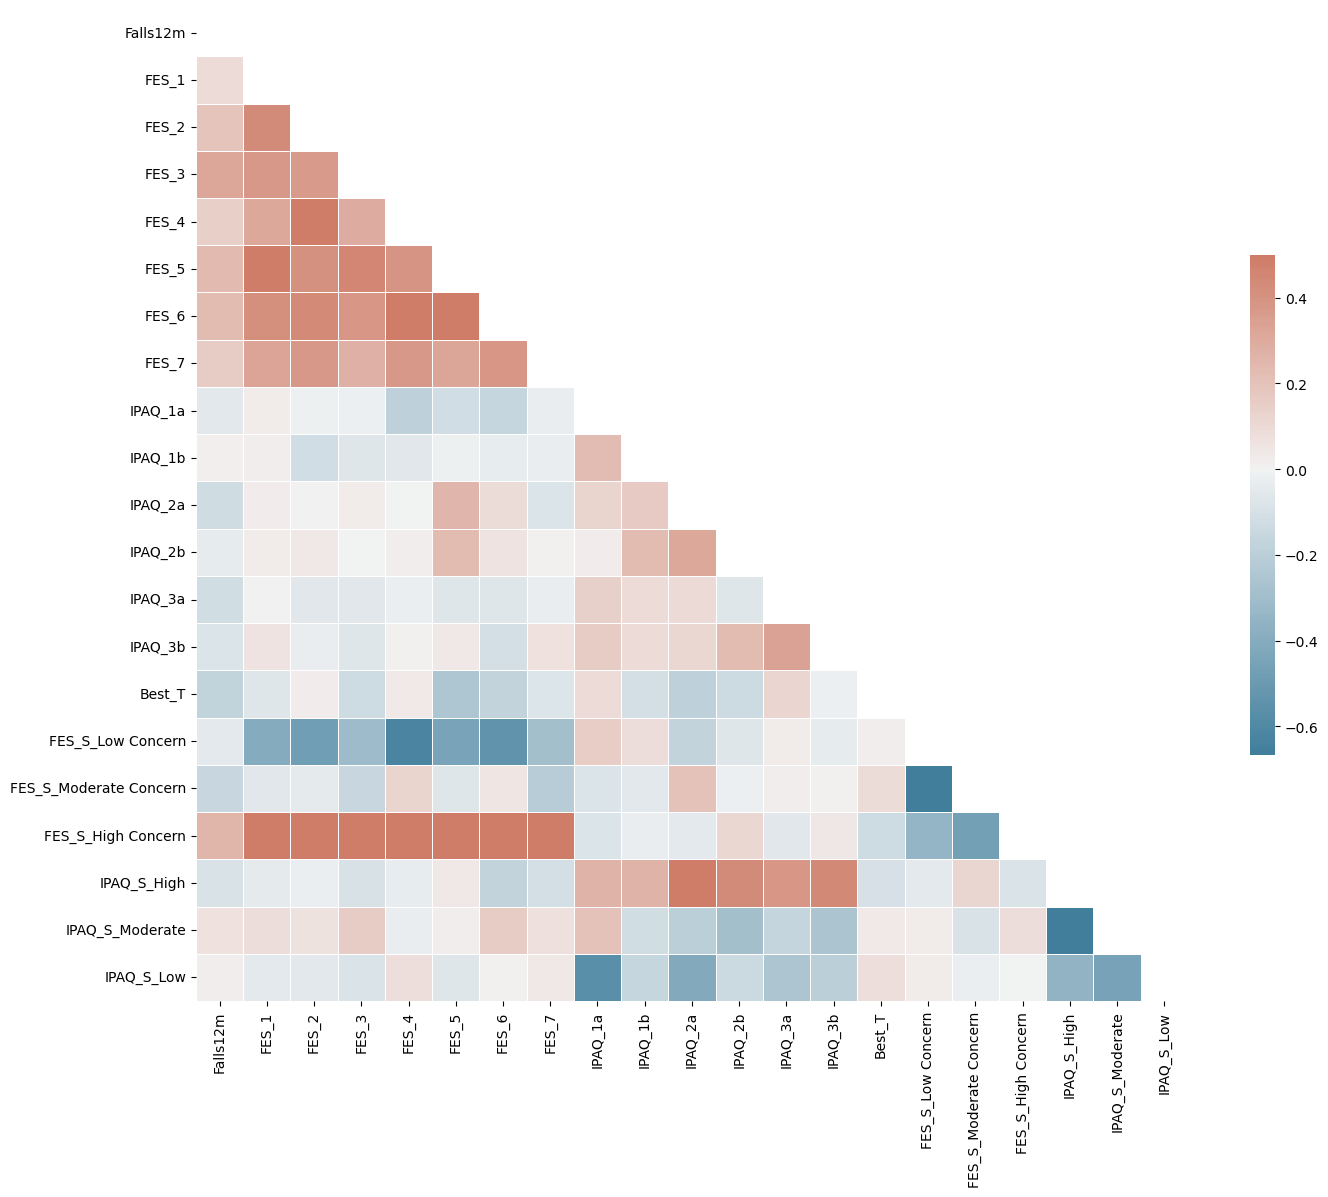

In [49]:
import seaborn as sns
f, ax = plt.subplots(figsize=(16, 13))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
f.savefig("Correlation Map.pdf")